Качество Apple
https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality
Набор данных включает в себя такие детали, как идентификатор фруктов, размер, вес, сладость, хрустящая, сочность, зрелость, кислотность и качество.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

pd.set_option('display.max_rows', None)    
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)    
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("/Users/olga.baltutskaya/Downloads/apple_quality.csv")
df.head()

A_id   Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0 0.000 -3.970  -2.512      5.346       -1.012      1.845     0.330   
1 1.000 -1.195  -2.839      3.664        1.588      0.853     0.868   
2 2.000 -0.292  -1.351     -1.738       -0.343      2.839    -0.038   
3 3.000 -0.657  -2.272      1.325       -0.098      3.638    -3.414   
4 4.000  1.364  -1.297     -0.385       -0.553      3.031    -1.304   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

Основные характеристики:

- A_id: Уникальный идентификатор для каждого фрукта
- Размер: Размер фрукта
- Вес: Вес фруктов
- Сладость: Степень сладости фруктов
- Хрустящий: Текстура, указывающая на хрустящую хрустящую кость плода
- Сочность: Уровень сочности фруктов
- Спелость: Стадия созревания плода
- Кислотность: Уровень кислотности плода
- Качество: Общее качество фруктов

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


- Dataset состоит из **4001 записей (строк)** и **9 колонок (признаков)**.
- Большая часть данных представлена числами с плавающей точкой (**float64**), что указывает на количественную природу этих данных. Признаки **Acidity,  Quality** относятся к типу **object64**. 
- **Присутствуют пропущенные значения** 
- Память, занимаемая Dataset, составляет **281.4KB+ **.

In [4]:
#Преобразуем таблицу и данные
df.drop('A_id', axis= 1 , inplace= True ) 
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Acidity'] = df['Acidity'].astype('float64')
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 281.2+ KB


In [6]:
#Базовые статистики
df.describe()

Size   Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
count 4000.000 4000.000   4000.000     4000.000   4000.000  4000.000 4000.000
mean    -0.503   -0.990     -0.470        0.985      0.512     0.498    0.077
std      1.928    1.603      1.943        1.403      1.930     1.874    2.110
min     -7.152   -7.150     -6.894       -6.055     -5.962    -5.865   -7.011
25%     -1.817   -2.012     -1.738        0.063     -0.801    -0.772   -1.377
50%     -0.514   -0.985     -0.505        0.998      0.534     0.503    0.023
75%      0.806    0.031      0.802        1.894      1.836     1.766    1.510
max      6.406    5.791      6.375        7.620      7.364     7.238    7.405

<Axes: ylabel='Quality'>

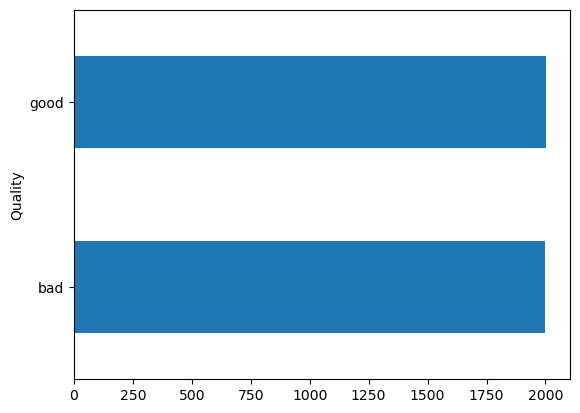

In [7]:

df['Quality'].value_counts().sort_values(ascending=True).plot.barh()

Классы сбалансированны. 
Можно приступить к дальнейшему анализу.

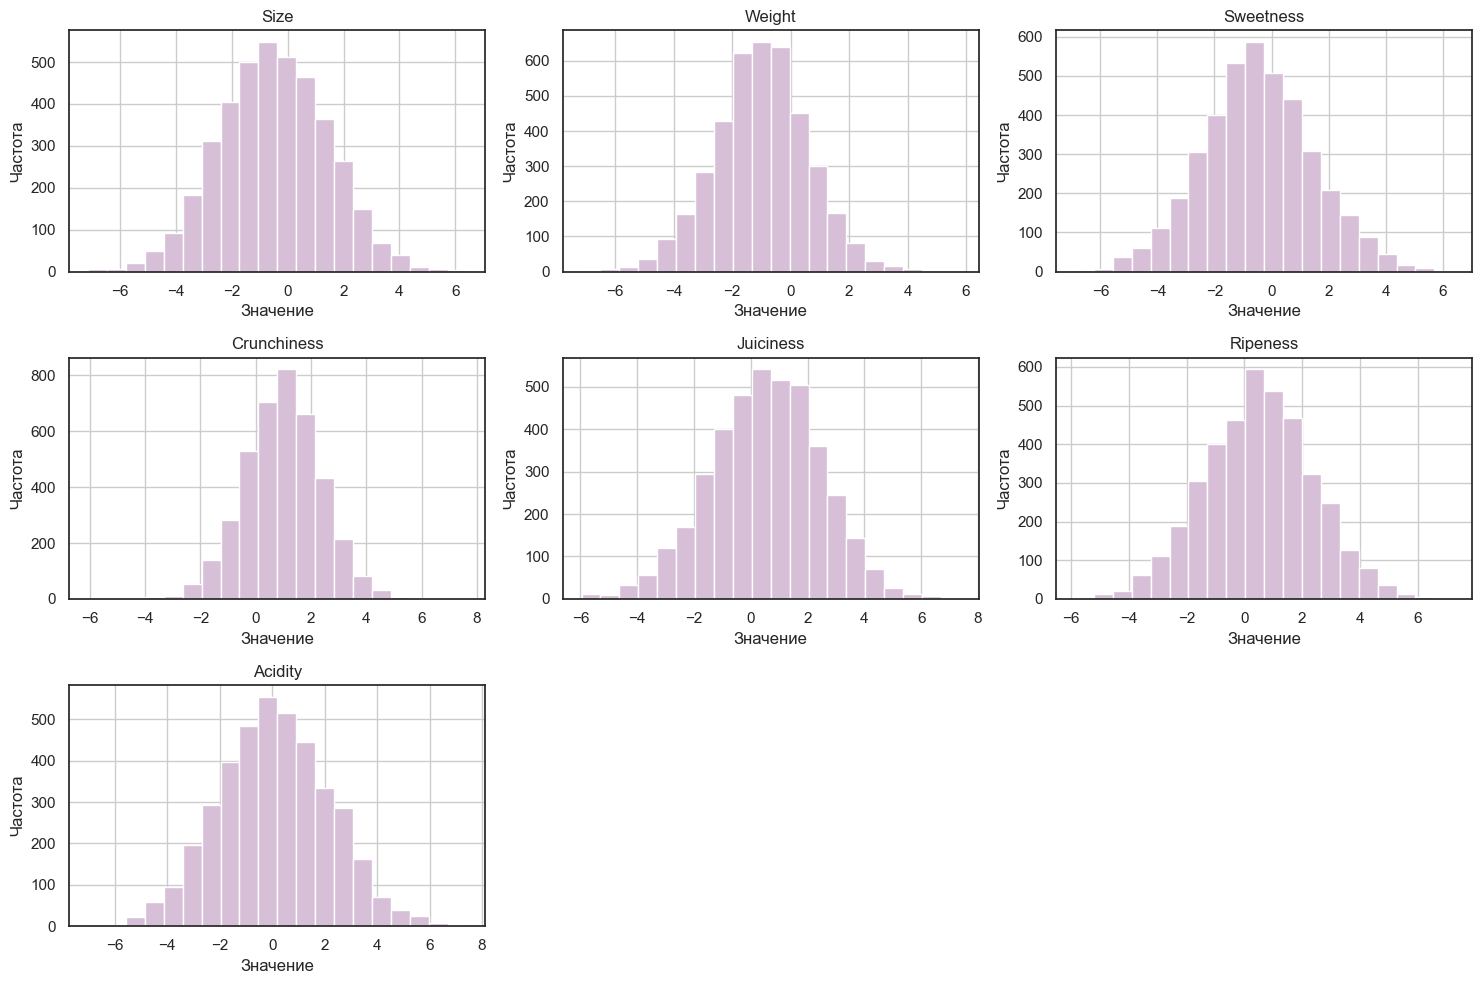

In [8]:
#Построим гистограммы каждого вида распределений
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

df.hist(bins=20, figsize=(15, 10), color='thistle')

for ax in plt.gcf().get_axes():
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.set_title(ax.get_title().replace('Quality', 'Качество яблок'))


plt.tight_layout()
plt.show()

Нормальное распределение прослеживается по всем признакам.

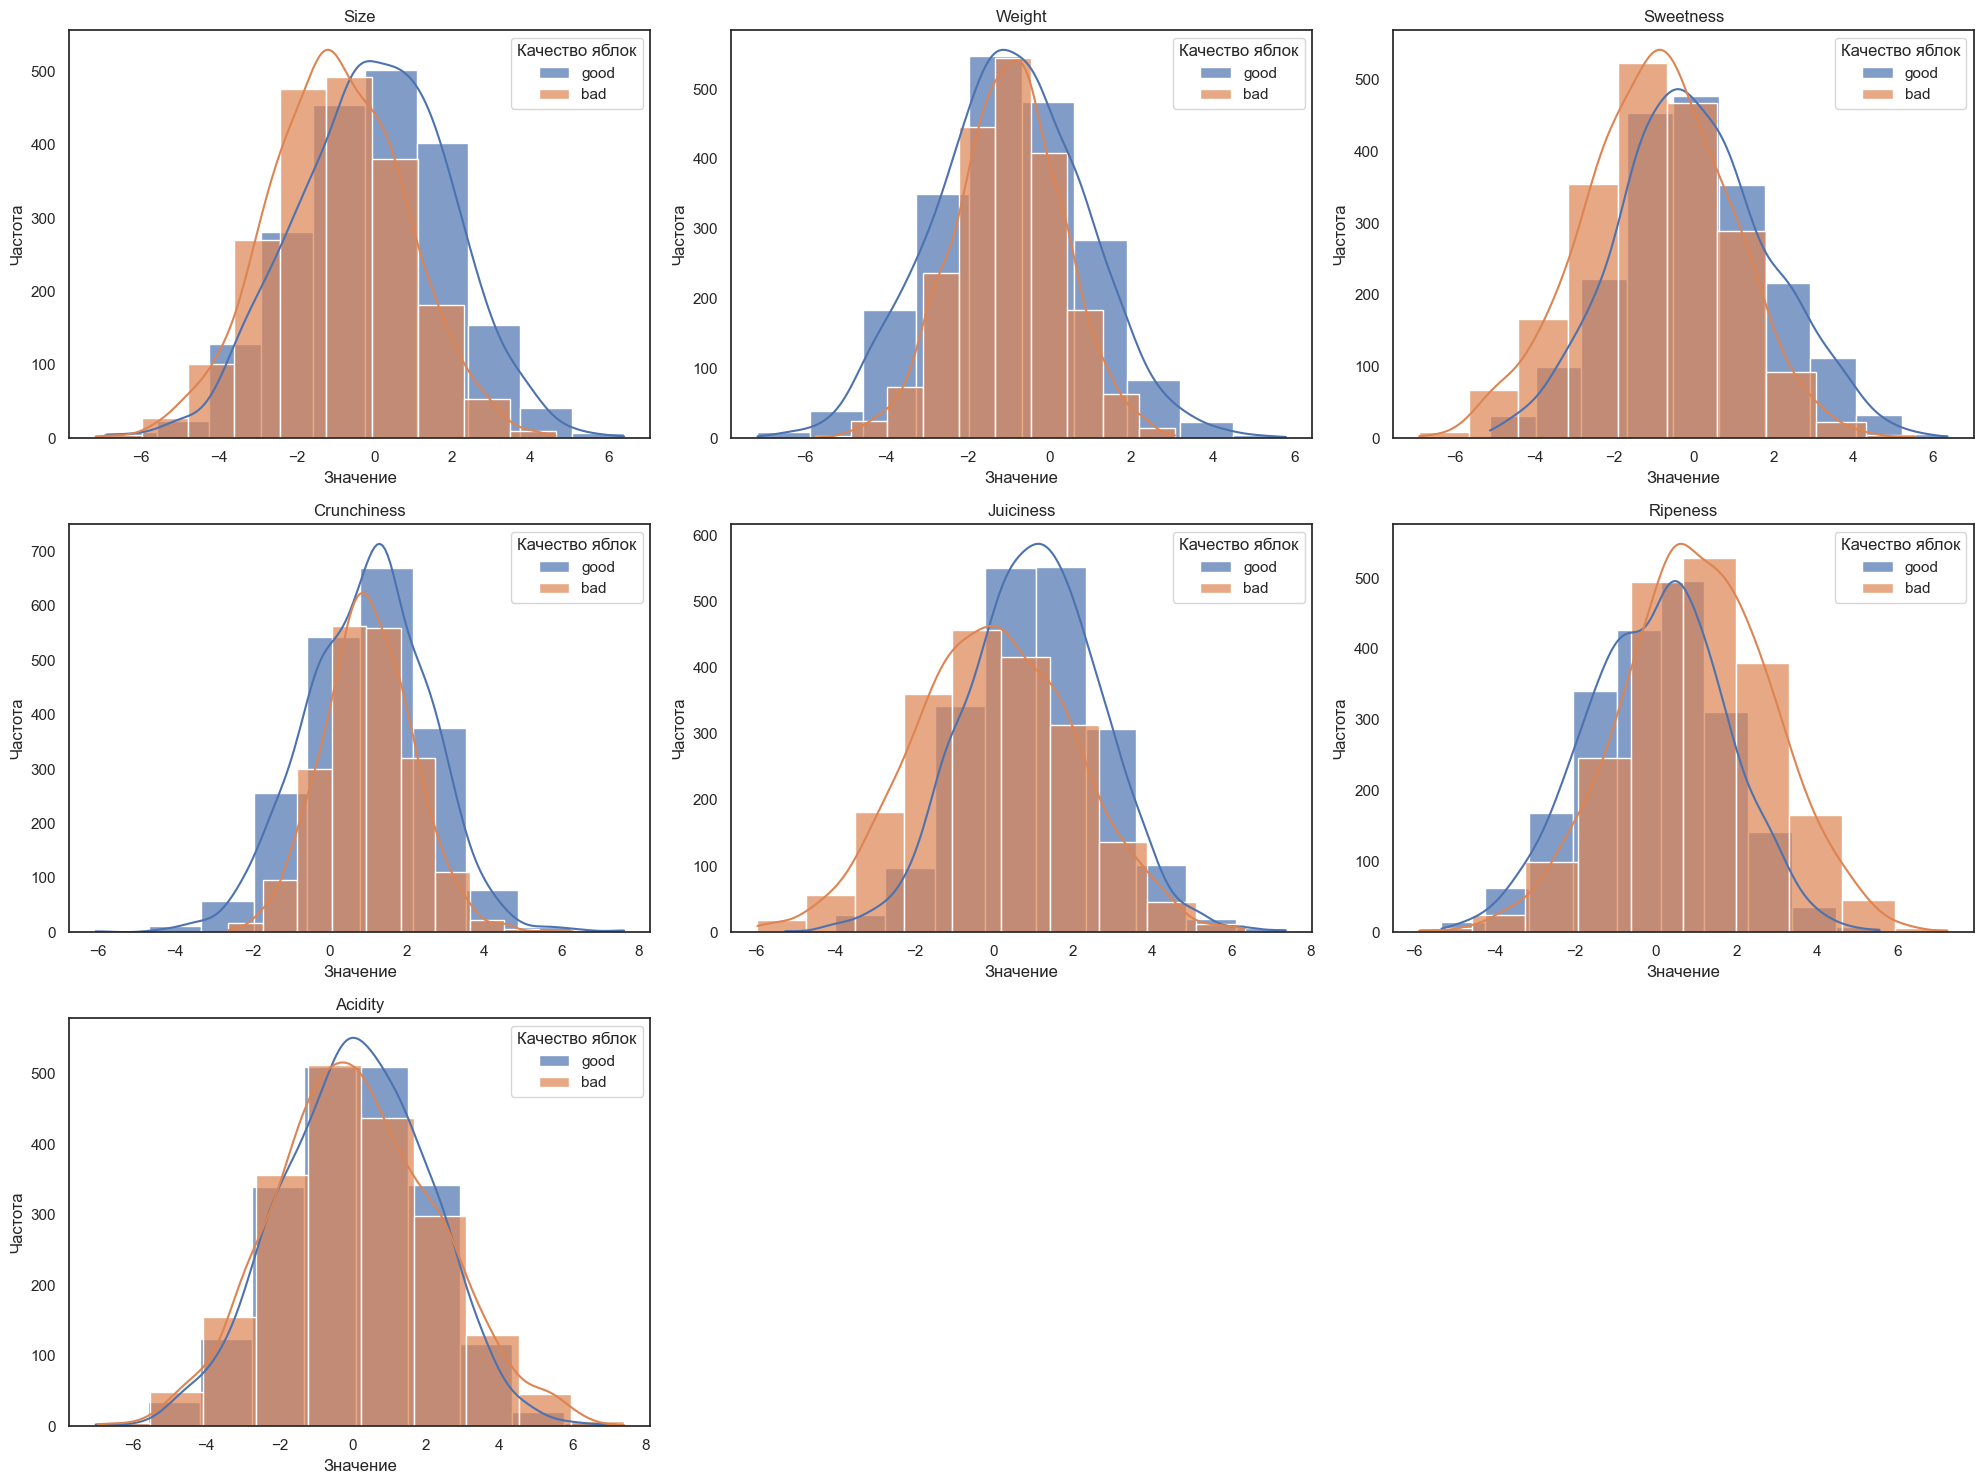

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="white")

Quality_appel = df['Quality'].unique()

num_columns = 3
num_variables = len(df.select_dtypes(include=['float64', 'int']).columns)
num_rows = int(np.ceil(num_variables / num_columns))


fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, num_rows * 5))
axes = axes.flatten()  


for i, column in enumerate(df.select_dtypes(include=['float64', 'int']).columns):
    for Quality in Quality_appel:
        sns.histplot(data=df[df['Quality'] == Quality], x=column, bins=10,
                     label=Quality, kde=True, ax=axes[i], alpha=0.7)

    axes[i].set_title(column)
    axes[i].set_xlabel('Значение')
    axes[i].set_ylabel('Частота')
    axes[i].legend(title='Качество яблок')

for j in range(i + 1, num_rows * num_columns):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

/Users/olga.baltutskaya/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


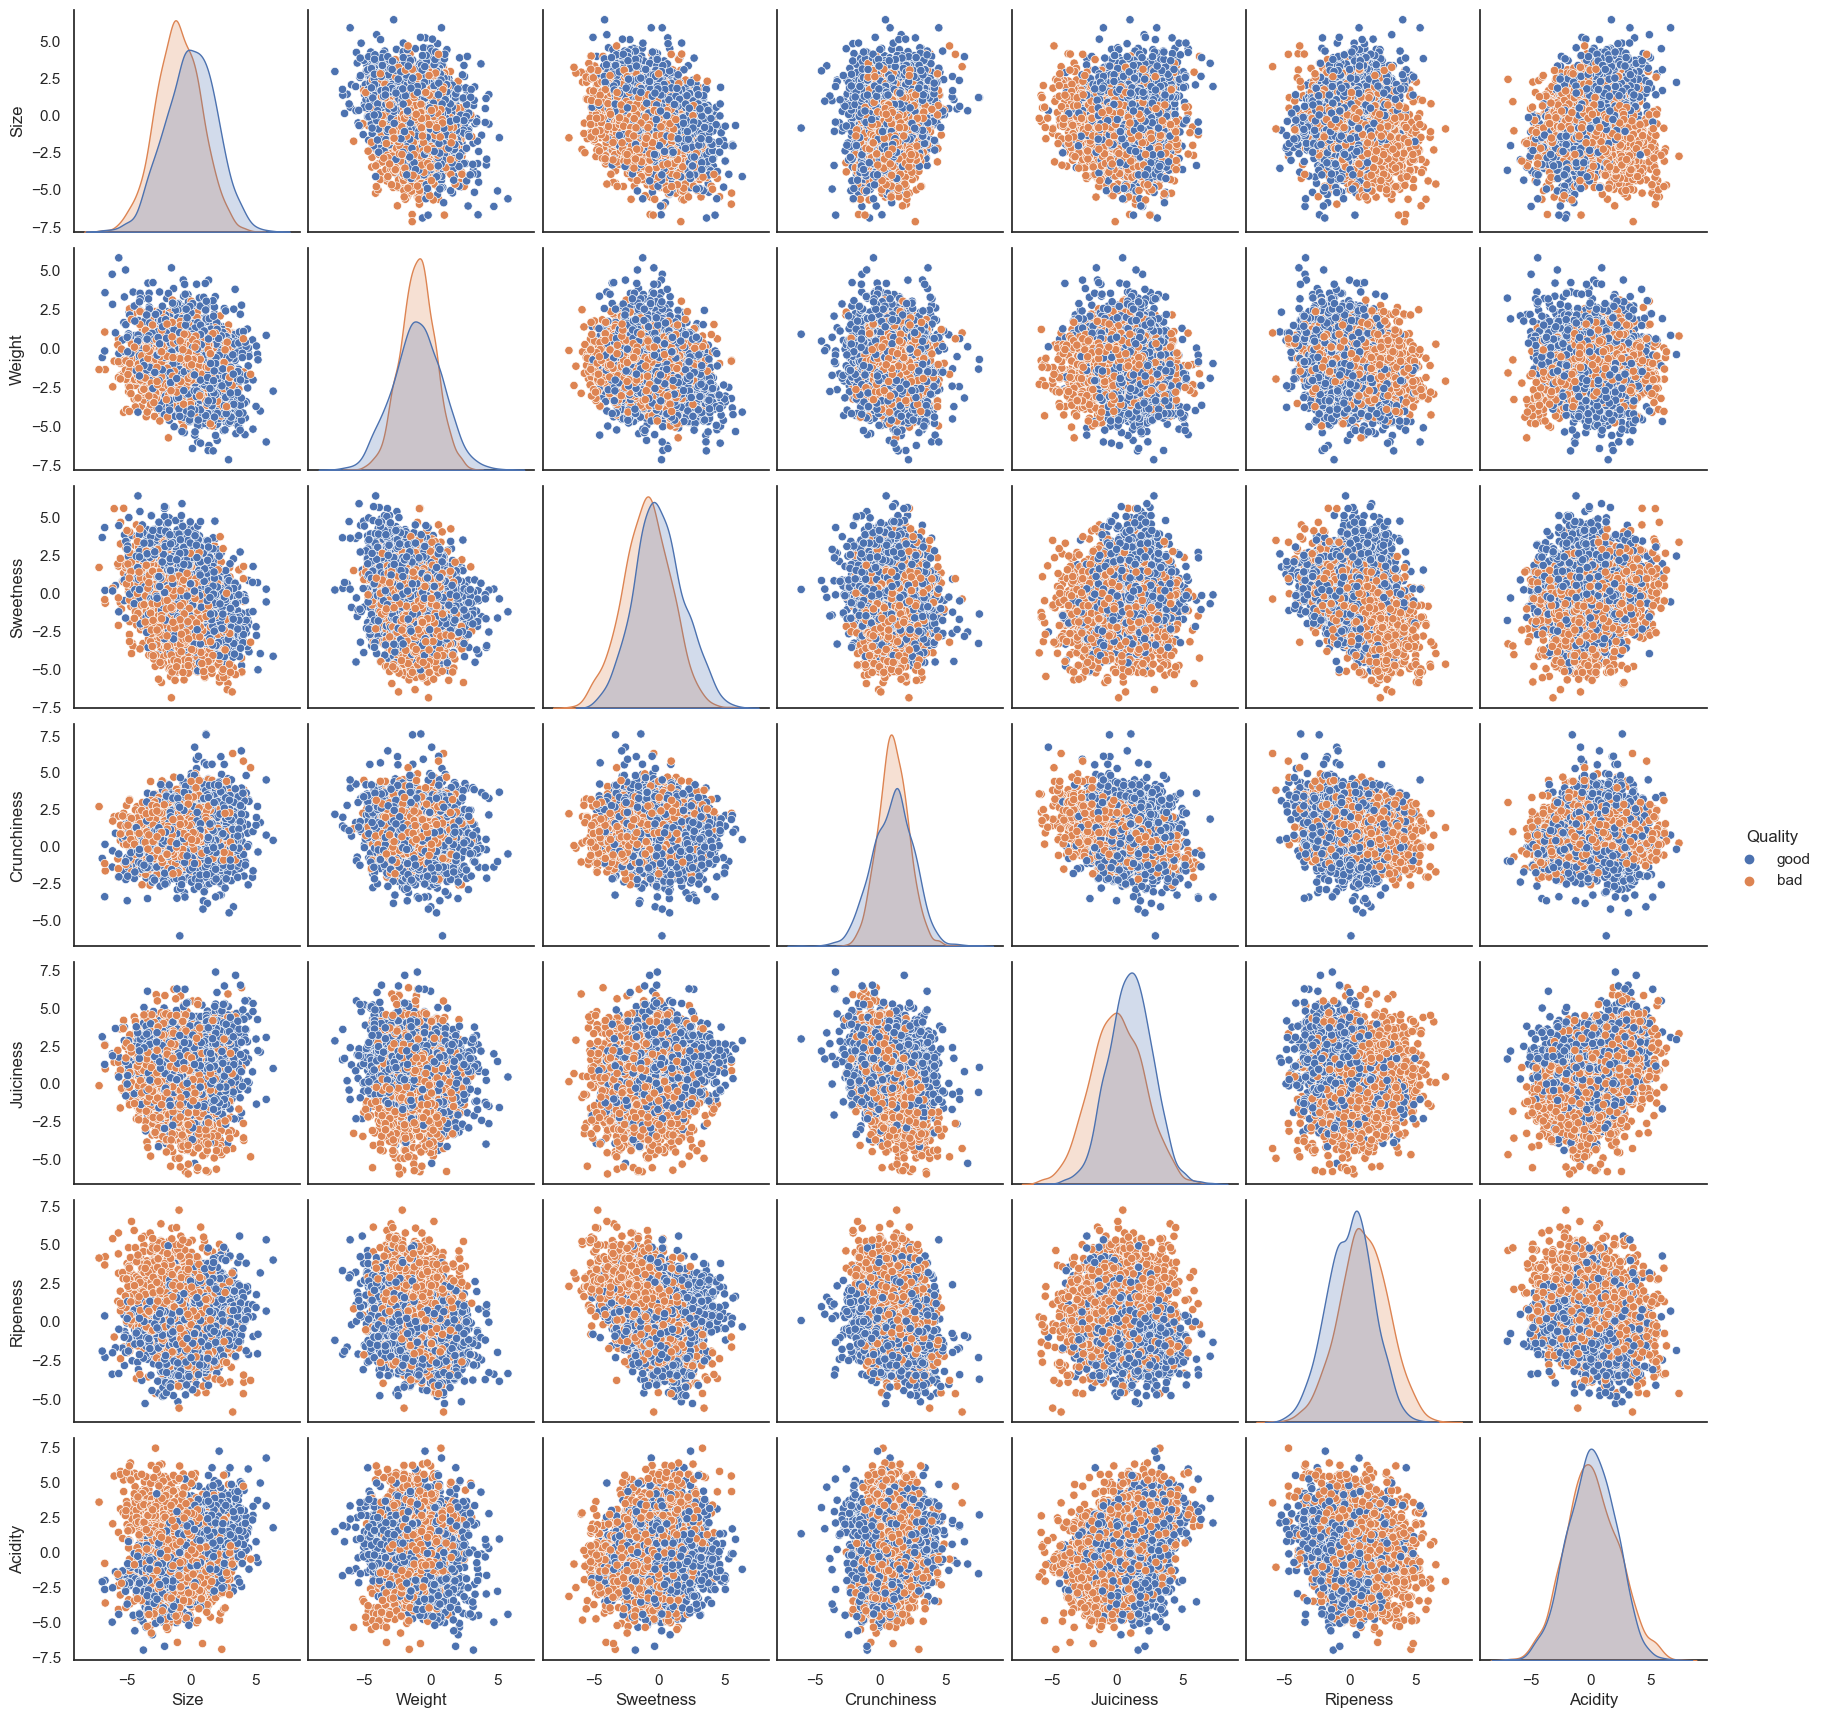

In [10]:
#Построим облако точек
sns.pairplot(df, hue="Quality")
plt.show()

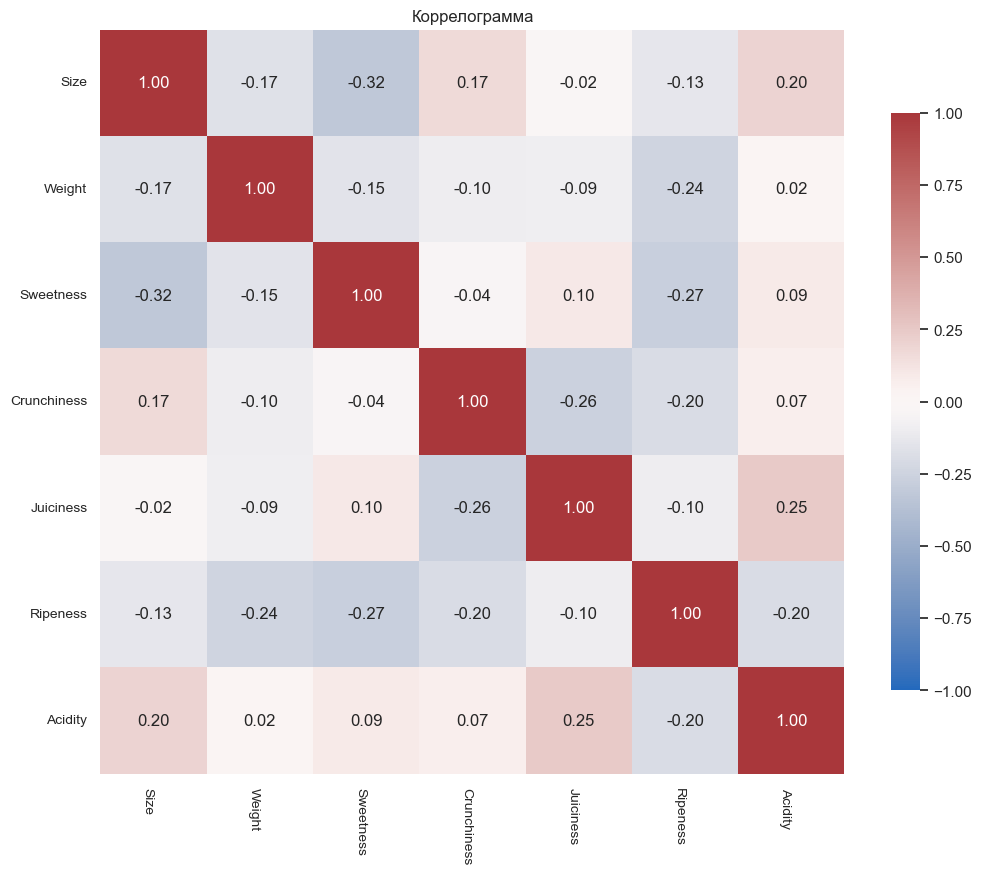

In [11]:
#Построим корелогамму
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.loc[:, ~df.columns.isin(['Quality'])].corr()

sns.set(style="white")

mask = None

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 10)) 
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap="vlag", cbar=True, square=True,
            center=0, vmin=-1, vmax=1, cbar_kws={"shrink": .75})  

plt.title('Коррелограмма')
plt.xticks(rotation=-90, ha="right", fontsize=10)
plt.yticks(rotation=0, ha="right", fontsize=10)

plt.show()

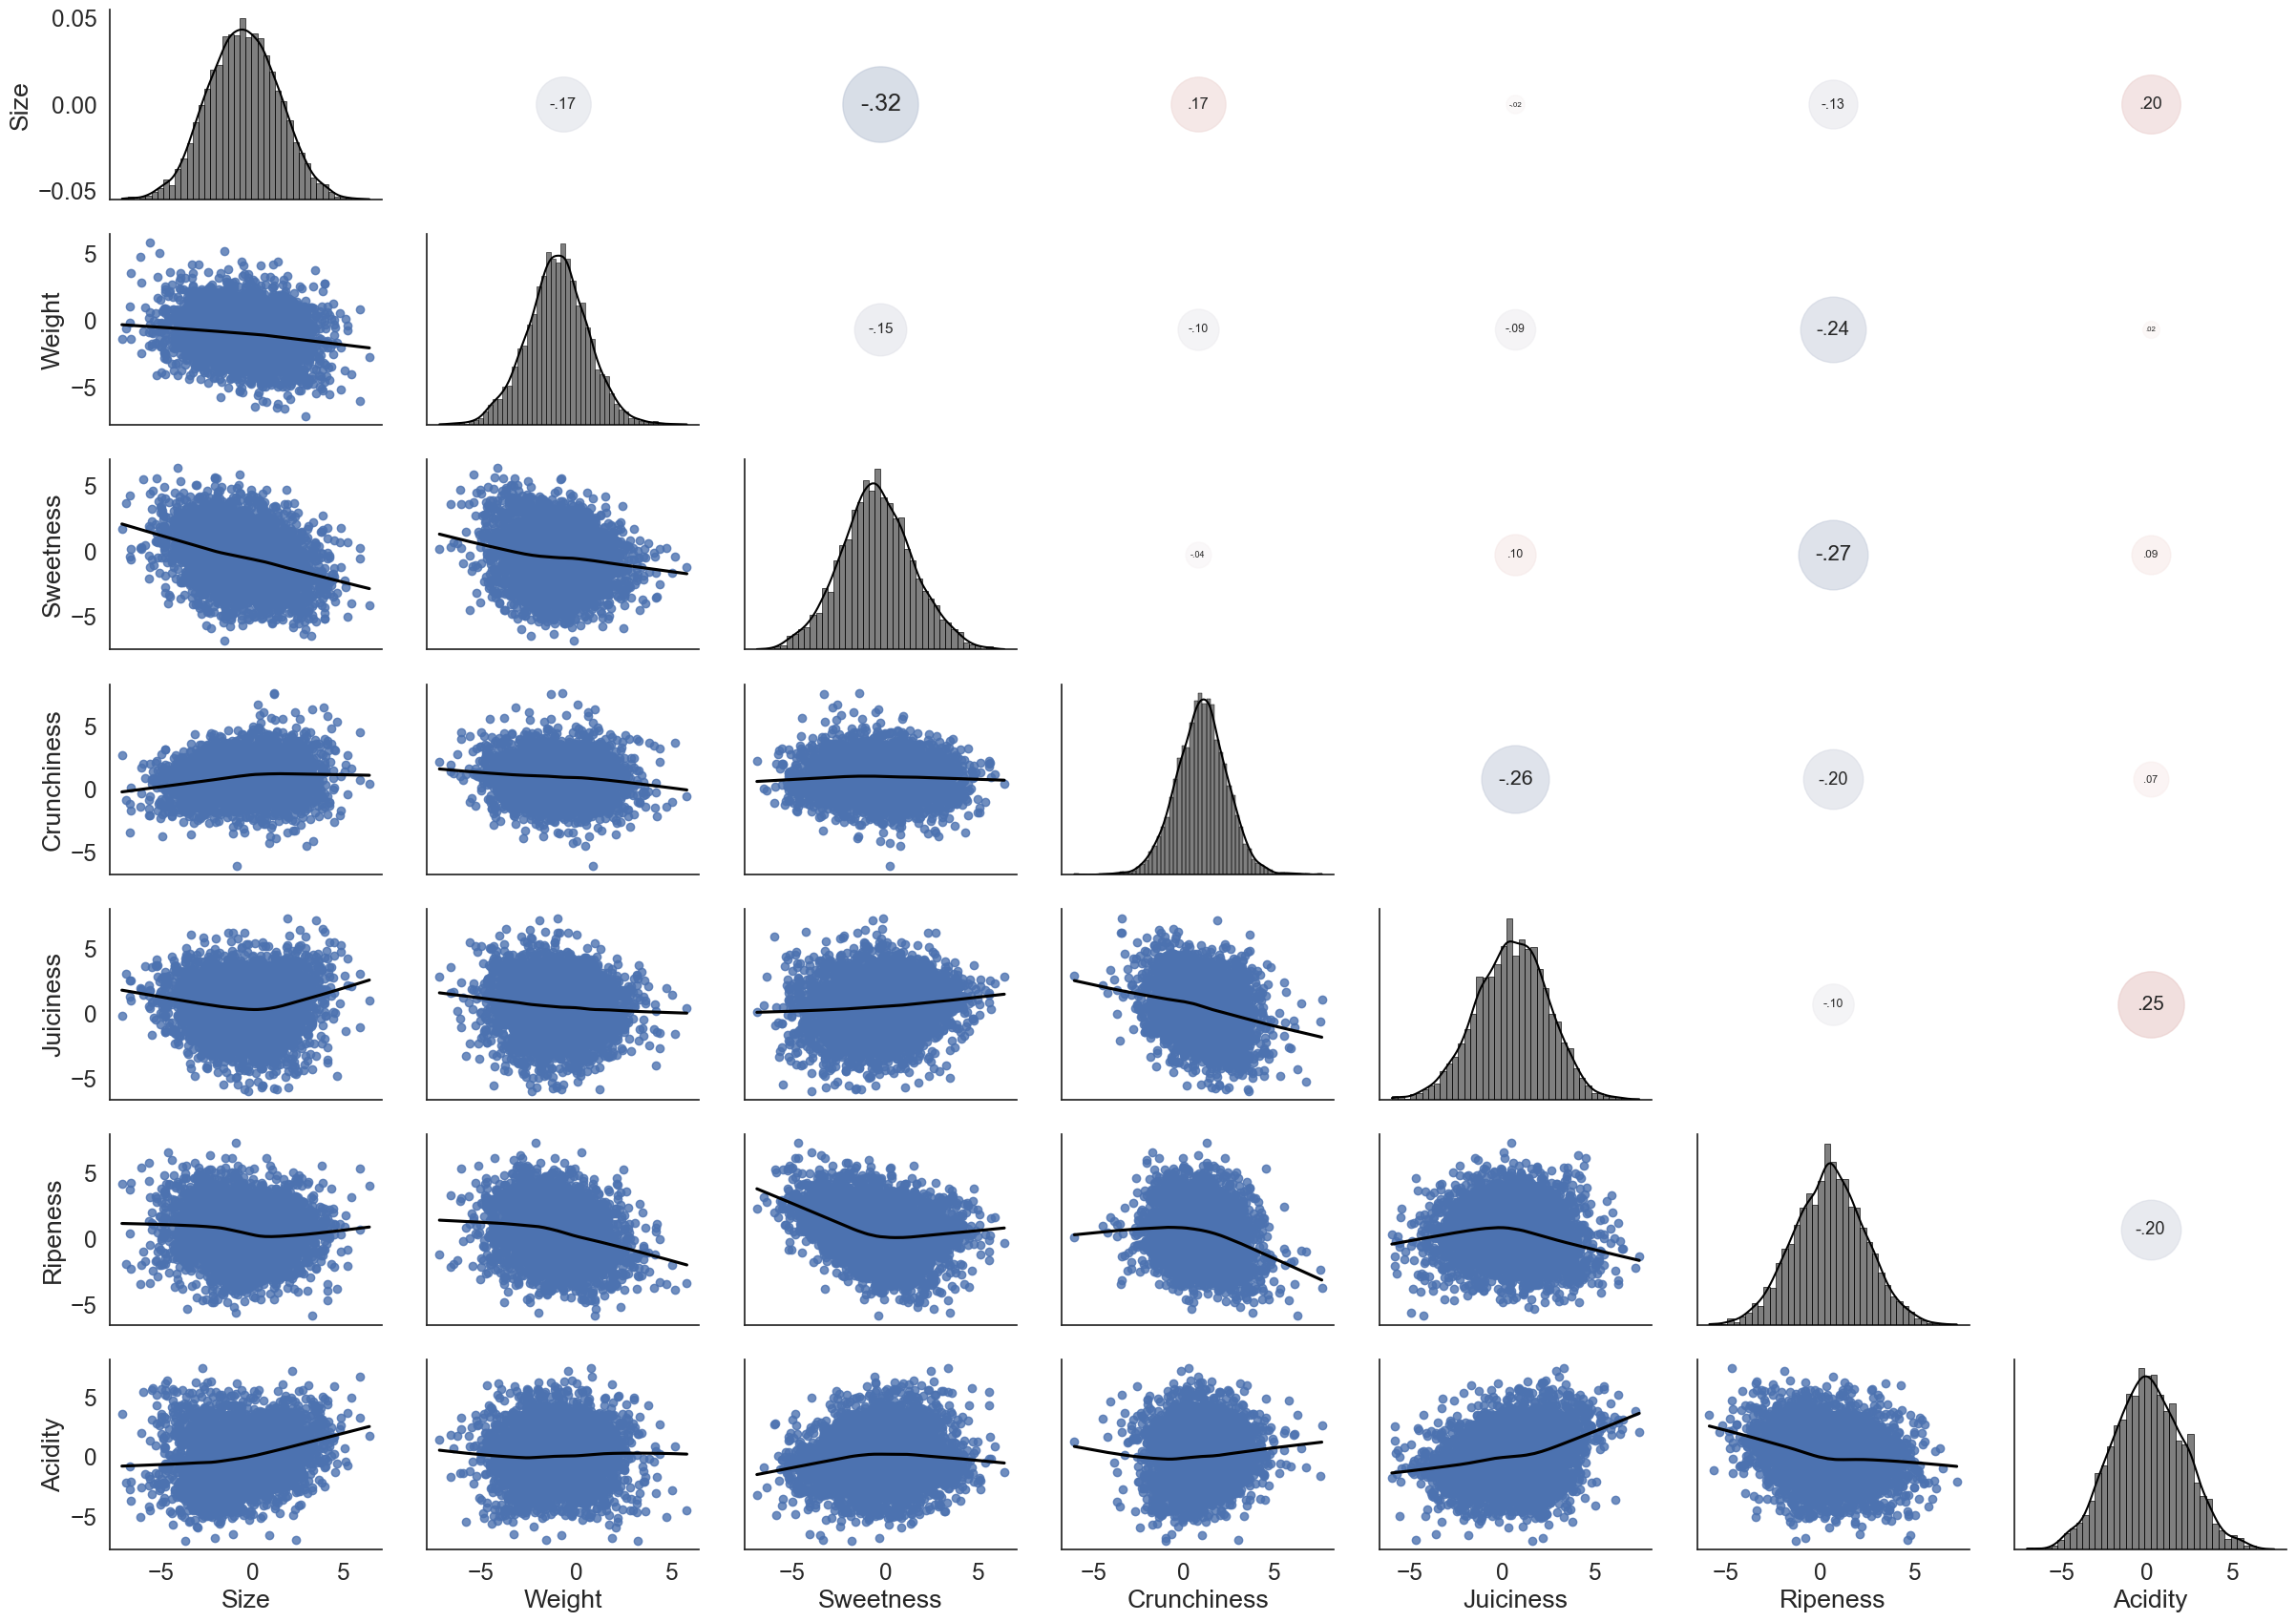

In [12]:
#"Всё в одном"
import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="vlag",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})

g.map_diag(sns.histplot, kde=True, color='black', edgecolor='black')

g.map_upper(corrdot)

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[list(set(df.columns)-{'Quality'})]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(['VIF'], ascending=False)

feature   VIF
4       Weight 1.605
2     Ripeness 1.579
6    Sweetness 1.425
1  Crunchiness 1.371
3         Size 1.297
5    Juiciness 1.216
0      Acidity 1.171

Между признаками нет сильной мультиколлинеарности, каждый признак хорошо предсказывается другими признаками в модели.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

for Quality in df.Quality.unique():
  X = df[df.Quality == Quality][list(set(df.columns)-{'Quality'})]
  vif_data = pd.DataFrame()
  vif_data["feature"] = X.columns
  vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  print(Quality)
  display(vif_data.sort_values(['VIF'], ascending=False))

good


feature   VIF
3         Size 2.406
4       Weight 1.967
6    Sweetness 1.734
0      Acidity 1.670
2     Ripeness 1.461
5    Juiciness 1.428
1  Crunchiness 1.307

bad


feature   VIF
2     Ripeness 3.200
6    Sweetness 2.224
3         Size 1.912
1  Crunchiness 1.691
5    Juiciness 1.588
4       Weight 1.536
0      Acidity 1.474

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

#Разделяем фатафрейм на признаки и разметку
df_dropped = df.drop(df.index[57:61])

X = df_dropped.copy()
del X['Quality']
y = df_dropped.Quality.copy()

#Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
#Импорт моделей
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

#Обучение моделей и сохранение обученных конвейеров
trained_pipelines = {}

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.95), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    trained_pipelines[name] = pipeline  
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.68375
SVM accuracy: 0.845
Random Forest accuracy: 0.84875
KNN accuracy: 0.82
Naive Bayes accuracy: 0.7425
Decision Tree accuracy: 0.785


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X_check = df.iloc[57:61].copy()
del X_check['Quality']
real_class = df.iloc[57:61].Quality.copy()

display(X_check)
display(real_class)

Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity
57  1.098  -1.020      1.211        1.260     -1.030     2.623    2.663
58 -0.480  -0.079     -0.844        3.050      3.664    -0.366   -1.474
59  0.833   0.450     -1.639       -0.631      2.831    -0.669    1.049
60 -3.464   1.352      0.458        0.893      3.130    -1.745   -2.205

57    good
58    good
59    good
60    good
Name: Quality, dtype: object

In [19]:
predictions = {}
for name, pipeline in trained_pipelines.items():
    pred = pipeline.predict(X_check)
    predictions[name] = pred

for i, a in predictions.items():
  print(f'{i}:')
  for c in a:
    print(f'    {c}')

print(f'\nReal Class:')
for c in real_class:
  print(f'    {c}')

Logistic Regression:
    bad
    good
    good
    good
SVM:
    good
    good
    good
    good
Random Forest:
    good
    good
    good
    good
KNN:
    good
    good
    good
    good
Naive Bayes:
    bad
    good
    good
    good
Decision Tree:
    bad
    good
    good
    bad

Real Class:
    good
    good
    good
    good


На исходных параметрах обучение моделей произошло на хорошем уровне.
И вместе с тем будем стремиться к улучшению наших результатов.

In [20]:
#Cгенерируем полиномиальные признаки
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

data = df.drop(['Quality'], axis=1).copy()

poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly_features.fit_transform(data)
poly_data = pd.DataFrame(poly_data, columns=poly_features.get_feature_names_out(data.columns))
data = pd.concat([poly_data], axis=1)

display(data.head())


Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  Acidity  \
0 -3.970  -2.512      5.346       -1.012      1.845     0.330   -0.492   
1 -1.195  -2.839      3.664        1.588      0.853     0.868   -0.723   
2 -0.292  -1.351     -1.738       -0.343      2.839    -0.038    2.622   
3 -0.657  -2.272      1.325       -0.098      3.638    -3.414    0.791   
4  1.364  -1.297     -0.385       -0.553      3.031    -1.304    0.502   

   Size^2  Size Weight  Size Sweetness  Size Crunchiness  Size Juiciness  \
0  15.761        9.974         -21.225             4.018          -7.324   
1   1.429        3.394          -4.379            -1.898          -1.020   
2   0.085        0.395           0.508             0.100          -0.829   
3   0.432        1.493          -0.871             0.064          -2.391   
4   1.861       -1.769          -0.525            -0.754           4.135   

   Size Ripeness  Size Acidity  Weight^2  Weight Sweetness  \
0         -1.309         1.952     6.312           -13.432   
1         -1.037         0.864     8.061           -10.403   
2          0.011        -0.766     1.826             2.349   
3          2.244        -0.520     5.160            -3.010   
4         -1.779         0.685     1.681             0.499   

   Weight Crunchiness  Weight Juiciness  Weight Ripeness  Weight Acidity  \
0               2.543            -4.635           -0.829           1.235   
1              -4.509            -2.423           -2.463           2.052   
2               0.463            -3.836            0.051          -3.543   
3               0.222            -8.264            7.755          -1.796   
4               0.717            -3.930            1.691          -0.651   

   Sweetness^2  Sweetness Crunchiness  Sweetness Juiciness  \
0       28.583                 -5.411                9.863   
1       13.425                  5.819                3.126   
2        3.022                  0.596               -4.935   
3        1.755                 -0.130                4.820   
4        0.148                  0.213               -1.166   

   Sweetness Ripeness  Sweetness Acidity  Crunchiness^2  \
0               1.763             -2.628          1.024   
1               3.179             -2.648          2.522   
2               0.066             -4.558          0.117   
3              -4.523              1.048          0.010   
4               0.502             -0.193          0.306   

   Crunchiness Juiciness  Crunchiness Ripeness  Crunchiness Acidity  \
0                 -1.867                -0.334                0.497   
1                  1.355                 1.378               -1.148   
2                 -0.973                 0.013               -0.898   
3                 -0.356                 0.334               -0.077   
4                 -1.676                 0.721               -0.278   

   Juiciness^2  Juiciness Ripeness  Juiciness Acidity  Ripeness^2  \
0        3.404               0.609             -0.907       0.109   
1        0.728               0.740             -0.617       0.753   
2        8.058              -0.108              7.442       0.001   
3       13.235             -12.419              2.877      11.654   
4        9.186              -3.952              1.521       1.700   

   Ripeness Acidity  Acidity^2  
0            -0.162      0.242  
1            -0.627      0.522  
2            -0.100      6.873  
3            -2.699      0.625  
4            -0.655      0.252

In [21]:
data['Quality'] = df['Quality'].copy()

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

data_dropped = data.drop(data.index[57:61])

X = data_dropped.copy()
del X['Quality']
y = data_dropped.Quality.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

#Обучение моделей и сохранение обученных конвейеров
trained_pipelines = {}

for name, model in models.items():
    pipeline = make_pipeline(StandardScaler(), PCA(n_components=0.95), model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    trained_pipelines[name] = pipeline  
    print(f"{name} accuracy: {accuracy}")

Logistic Regression accuracy: 0.8275
SVM accuracy: 0.86875
Random Forest accuracy: 0.875
KNN accuracy: 0.87125
Naive Bayes accuracy: 0.8
Decision Tree accuracy: 0.81


In [26]:
#Построим график с тем, как изменились метрики
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'KNN', 
              'Naive Bayes', 'Decision Tree'],
    'Исходный набор данных': [0.68375, 0.845, 0.8575, 0.82, 0.7425, 0.7825],
    'Исходный набор данных + Генерация полиномиальных признаков': [0.8275, 0.86875, 0.875,
                                                                   0.87125, 0.8, 0.81] 
}

df = pd.DataFrame(data)

plt.figure(figsize=(15, 10))
barWidth = 0.25

r1 = range(len(df['Model']))
r2 = [x + barWidth for x in r1]

plt.bar(r1, df['Исходный набор данных'], color='skyblue', width=barWidth, 
        edgecolor='skyblue', label='Исходный набор данных')
plt.bar(r2, df['Исходный набор данных + Генерация полиномиальных признаков'], 
        color='thistle', width=barWidth, edgecolor='thistle',
        label='Исходный набор данных + Генерация полиномиальных признаков')

plt.title('Accuracy of Different Models')
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(df['Model']))], df['Model'])
plt.ylabel('Accuracy', fontweight='bold')
plt.legend()
plt.show()

На основе сравнительного графика, сделаем вывод, что с генерацией полиномиальных признаков обучение моделей нужно заканчивать. 
Достигнуты высокие показатели.